In [1]:
from __future__ import print_function
from ROOT import TFile
import ROOT
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from math import sqrt,cos,acos,pi,exp,sin,atan2,log
from numpy import arange,mean,asarray,isnan,isinf
import pickle

import csv
import sys
import pandas as pd
from root_pandas import read_root
import os

from SelectionHelper import BDTensemble,selection

from SelectionDefs import NewAng, VtxInSimpleFid, VtxInFid, GetPhiT, pTrans,pTransRat
from SelectionDefs import alphaT, ECCQE, ECal, Q2, OpenAngle, PhiDiff, edgeCut
from SelectionDefs import ECCQE_mom, Boost, BoostTracks, Getpz, Getq3q0

newCalib_m = 0.01255796


# POT Breakdown for Each Run
C1_POT = 1.558e+20 + 1.129e+17 + 1.869e+19
D2_POT = 1.63e+20 + 2.964e+19 + 1.239e+19
E1_POT = 5.923e+19
F1_POT = 4.3e+19
G1_POT = 1.701e+20 + 2.97e+19 + 1.524e+17


DAT_POT1 = C1_POT
DAT_POT2 = E1_POT+D2_POT
DAT_POT3 = F1_POT+G1_POT
    
DATPOTDICT = {1:DAT_POT1,2:DAT_POT2,3:DAT_POT3}

OVR_POT1  = 4.71579e+20
OVR_POT1rr  = 1.33681555217E+21
NUE_POT1  = 9.80259e+22
NUE_POT1rr  = 1.15690338134E+23
LOWE_POT1 = 6.05398370114e+23
LOWM_POT1 = 1.63103516179e+21
DIRT_POT1 = 1.0
OPEN_POT1 = 4.403e19
EXT_POT1  = 22474918.0 / 9776965.0 * OPEN_POT1
NCPi0_POT1 = 2.90763E+21
CCPi0_POT1 = 6.91412E+20


OVR_POT2  = 4.08963968669e+20
OVR_POT2rr  = 1.29919202522E+21
NUE_POT2  = 9.2085012316e+22
LOWE_POT2 = 7.497617079E+23
LOWM_POT2 = 2.0290756497E+21

OVR_POT3  = 8.98773223801e+20
NUE_POT3  = 4.70704675581e+22
LOWE_POT3 = 5.97440749241e+23
LOWM_POT3 = 1.51234621011e+21
DIRT_POT3 = 1.0
OPEN_POT3 = 8.786e+18
EXT_POT3  = 39566274.0 / 2263559.0 * OPEN_POT3
NCPi0_POT3 = 2.22482E+21 + 2.64479e+20
CCPi0_POT3 = 5.91343E+20

# Final BDT files correction
NUE_POT1 *= 190064./207548.
EXT_POT1 *= 64907./63119.
OVR_POT3 *= 314302./318046.
NUE_POT3 *= 100438./100186.


POTDICT = {1:{},2:{},3:{}}
POTDICT[1]['open'] = OPEN_POT1
POTDICT[1]['ext'] = EXT_POT1
POTDICT[1]['overlay'] = OVR_POT1rr
POTDICT[1]['overlay_lowE'] = LOWM_POT1
POTDICT[1]['intrinsics'] = NUE_POT1rr
POTDICT[1]['intrinsics_lowE'] = LOWE_POT1
POTDICT[1]['ncpi0'] = NCPi0_POT1 + OVR_POT1rr
POTDICT[1]['ccpi0'] = CCPi0_POT1 + OVR_POT1rr
POTDICT[2]['overlay'] = OVR_POT2rr
POTDICT[2]['overlay_lowE'] = LOWM_POT2
POTDICT[2]['intrinsics'] = NUE_POT2
POTDICT[2]['intrinsics_lowE'] = LOWE_POT2
POTDICT[3]['open'] = OPEN_POT3
POTDICT[3]['ext'] = EXT_POT3
POTDICT[3]['overlay'] = OVR_POT3
POTDICT[3]['overlay_lowE'] = LOWM_POT3
POTDICT[3]['intrinsics'] = NUE_POT3
POTDICT[3]['intrinsics_lowE'] = LOWE_POT3
POTDICT[3]['ncpi0'] = NCPi0_POT3 + OVR_POT3
POTDICT[3]['ccpi0'] = CCPi0_POT3 + OVR_POT3




Welcome to JupyROOT 6.16/00


In [2]:
# ---------------- Run 1 -------------- #
FileDict = {1:{},2:{},3:{}}
TreeDict = {1:{},2:{},3:{}}

FileDict[1]['ext']             = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v28_wctagger_extbnb_finalbdt.root")
FileDict[1]['overlay']         = ("/home/nwkamp/Research/MicroBooNE/Data/run1_overlay_stripmine.root")
FileDict[1]['intrinsics']      = ("/home/nwkamp/Research/MicroBooNE/Data/run1_intrinsics_rerun_stripmine.root")
FileDict[1]['intrinsics_lowE'] = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_run1_bnb_intrinsic_nue_overlay_LowE.root")
FileDict[1]['overlay_lowE']    = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_run1_bnb_nu_overlay_LowE.root")
FileDict[1]['ncpi0']           = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v40_NCPi0_run1_dlana_stripped_v2.root")
FileDict[1]['ccpi0']           = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v40_CCPi0_run1_dlana_stripped_v2.root")    

TreeDict[1]['ext']             = ("dlana/FinalVertexVariables")
TreeDict[1]['overlay']         = ("FinalVertexVariables")
TreeDict[1]['intrinsics']      = ("FinalVertexVariables")
TreeDict[1]['intrinsics_lowE'] = ("dlana/FinalVertexVariables")
TreeDict[1]['overlay_lowE']    = ("dlana/FinalVertexVariables")
TreeDict[1]['ncpi0']           = ("dlana/FinalVertexVariables")
TreeDict[1]['ccpi0']           = ("dlana/FinalVertexVariables")  





# ---------------- Run 2 -------------- #

  
FileDict[2]['overlay']         = ("/home/nwkamp/Research/MicroBooNE/Data/run2_overlay_stripmine.root")
FileDict[2]['intrinsics']      = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_dl_run2_bnb_intrinsics_nue_overlay_finalbdt.root")
FileDict[2]['intrinsics_lowE'] = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_intrinsic_nue_lowe_run2_fvv_stripped.root")
FileDict[2]['overlay_lowE']    = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_bnb_overlay_lowe_run2_fvv_stripped.root")


TreeDict[2]['overlay']         = ("FinalVertexVariables")
TreeDict[2]['intrinsics']      = ("dlana/FinalVertexVariables")
TreeDict[2]['intrinsics_lowE'] = ("dlana/FinalVertexVariables")
TreeDict[2]['overlay_lowE']    = ("dlana/FinalVertexVariables")




# ---------------- Run 3 -------------- #

FileDict[3]['ext']             = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_dl_run3_G1_extbnb_finalbdt.root")
FileDict[3]['overlay']         = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_dl_run3b_bnb_nu_overlay_nocrtremerge_finalbdt.root")
FileDict[3]['intrinsics']      = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_dl_run3b_bnb_intrinsic_nue_overlay_nocrtremerge_finalbdt.root")
FileDict[3]['intrinsics_lowE'] = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_dl_run3b_intrinsic_nue_LowE.root")
FileDict[3]['overlay_lowE']    = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_run3b_bnb_nu_overlay_LowE.root")
FileDict[3]['ncpi0']           = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v40_NCPi0_run3_dlana_stripped_v2.root")
FileDict[3]['ccpi0']           = ("/home/nwkamp/Research/MicroBooNE/Data/mcc9_v40_CCPi0_run3_dlana_stripped_v2.root")    

    
           
TreeDict[3]['ext']             = ("dlana/FinalVertexVariables")
TreeDict[3]['overlay']         = ("dlana/FinalVertexVariables")
TreeDict[3]['intrinsics']      = ("dlana/FinalVertexVariables")
TreeDict[3]['intrinsics_lowE'] = ("dlana/FinalVertexVariables")
TreeDict[3]['overlay_lowE']    = ("dlana/FinalVertexVariables")
TreeDict[3]['ncpi0']           = ("dlana/FinalVertexVariables")
TreeDict[3]['ccpi0']           = ("dlana/FinalVertexVariables")  

In [3]:
pi0Dict = {1:{},2:{},3:{}}
genieDict = {1:{},2:{},3:{}}

weightdir = '../aux/'
inference = 'avgscore'
pi0filename = 'final_avgscore'
pi0filename2 = 'final_avgscore'


pi0w_numu_1 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_numu_run1.txt"
pi0w_nue_1 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_nue_run1.txt"
pi0w_nue_low_1 = None
pi0w_numu_low_1 = None
pi0w_ncpi0_1 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_ncpi0_run1.txt"
pi0w_ccpi0_1 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_ccpi0_run1.txt"

pi0w_numu_2 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_numu_run2.txt"
pi0w_nue_2 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_nue_run2.txt"

pi0w_numu_3 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_numu_run3.txt"
pi0w_nue_3 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_nue_run3.txt"
pi0w_nue_low_3 = None
pi0w_numu_low_3 = None
pi0w_ncpi0_3 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_ncpi0_run3.txt"
pi0w_ccpi0_3 = weightdir+"1e1p_pi0weights/"+pi0filename+"/Mar24_pi0_weights_1e1p_"+pi0filename2+"_ccpi0_run3.txt"

pi0Dict[1]['ext'] = None
pi0Dict[1]['intrinsics'] = pi0w_nue_1
pi0Dict[1]['intrinsics_lowE'] = pi0w_nue_low_1
pi0Dict[1]['overlay'] = pi0w_numu_1
pi0Dict[1]['overlay_lowE'] = pi0w_numu_low_1
pi0Dict[1]['ncpi0'] = pi0w_ncpi0_1
pi0Dict[1]['ccpi0'] = pi0w_ccpi0_1

pi0Dict[2]['intrinsics'] = pi0w_nue_2
pi0Dict[2]['intrinsics_lowE'] = None
pi0Dict[2]['overlay'] = pi0w_numu_2
pi0Dict[2]['overlay_lowE'] = None

pi0Dict[3]['ext'] = None
pi0Dict[3]['intrinsics'] = pi0w_nue_3
pi0Dict[3]['intrinsics_lowE'] = pi0w_nue_low_3
pi0Dict[3]['overlay'] = pi0w_numu_3
pi0Dict[3]['overlay_lowE'] = pi0w_numu_low_3
pi0Dict[3]['ncpi0'] = pi0w_ncpi0_3
pi0Dict[3]['ccpi0'] = pi0w_ccpi0_3


    
    

ovrCVFile1  = (weightdir+"weights_forCV_v48_Sep24_bnb_nu_run1.root") 
nueCVFile1  = (weightdir+"weights_forCV_v48_Sep24_intrinsic_nue_run1.root") 
nueLowCVFile1 = (weightdir+"weights_forCV_v48_Sep24_intrinsic_nue_lowE_run1.root")
numuLowCVFile1 = (weightdir+"weights_forCV_v48_Sep24_bnb_nu_lowE_run1.root")

ovrCVFile2  = (weightdir+"weights_forCV_v48_Sep24_bnb_nu_run2.root") 
nueCVFile2  = (weightdir+"weights_forCV_v48_Sep24_intrinsic_nue_run2.root")
nueLowCVFile2 = (weightdir+"weights_forCV_v48_Sep24_intrinsic_nue_lowE_run2.root")
numuLowCVFile2 = (weightdir+"weights_forCV_v48_Sep24_bnb_nu_lowE_run2.root")

ovrCVFile3  = (weightdir+"weights_forCV_v48_Sep24_bnb_nu_run3.root") 
nueCVFile3  = (weightdir+"weights_forCV_v48_Sep24_intrinsic_nue_run3.root") 
nueLowCVFile3 = (weightdir+"weights_forCV_v48_Sep24_intrinsic_nue_lowE_run3.root")
numuLowCVFile3 = (weightdir+"weights_forCV_v48_Sep24_bnb_nu_lowE_run3.root")

NCPi0CVFile1 = (weightdir+"weights_forCV_v48_Sep24_nc_pi0_run1.root")
NCPi0CVFile3 = (weightdir+"weights_forCV_v48_Sep24_nc_pi0_run3.root")
CCPi0CVFile1 = (weightdir+"weights_forCV_v48_Sep24_cc_pi0_run1.root")
CCPi0CVFile3 = (weightdir+"weights_forCV_v48_Sep24_cc_pi0_run3.root")

genieDict[1]['ext'] = None
genieDict[1]['intrinsics'] = nueCVFile1
genieDict[1]['intrinsics_lowE'] = nueLowCVFile1
genieDict[1]['overlay'] = ovrCVFile1
genieDict[1]['overlay_lowE'] = numuLowCVFile1
genieDict[1]['ncpi0'] = NCPi0CVFile1
genieDict[1]['ccpi0'] = CCPi0CVFile1

genieDict[2]['intrinsics'] = nueCVFile2
genieDict[2]['intrinsics_lowE'] = nueLowCVFile2
genieDict[2]['overlay'] = ovrCVFile2
genieDict[2]['overlay_lowE'] = numuLowCVFile2

genieDict[3]['ext'] = None
genieDict[3]['intrinsics'] = nueCVFile3
genieDict[3]['intrinsics_lowE'] = nueLowCVFile3
genieDict[3]['overlay'] = ovrCVFile3
genieDict[3]['overlay_lowE'] = numuLowCVFile3
genieDict[3]['ncpi0'] = NCPi0CVFile3
genieDict[3]['ccpi0'] = CCPi0CVFile3


In [4]:

tag='3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'
BDTnumlist=range(20)
oldBDT = False

ensemble = BDTensemble(tag,BDTnumlist,oldBDT=oldBDT)


SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_0_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_0_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_1_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:

SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_13_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_13_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_14_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.

SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_2_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_2_ccpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_2_ncpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: lo

SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_8_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_8_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_8_ccpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserW

SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_13_ccpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_13_ncpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_14_ext.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt:

SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_19_ext.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_19_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_19_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: User

SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R3_11_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R3_11_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:311: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R3_12_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.

In [5]:
### All possible cuts on data/mc ###

lowEpatch      = False#True if fset in [0,5,8,9] else False

def GetShCons(QU,QV,QY):

    EU = QU*0.0155481
    EV = QV*0.01586385
    EY = QY*0.01319672

    return np.sqrt((EU-EV)**2 + (EU-EY)**2 + (EY-EV)**2)/(EY+1e-6)
    



 #################### RUN 1 #################### 

Sample: /home/nwkamp/Research/MicroBooNE/Data/run1_intrinsics_rerun_stripmine.root
1 intrinsics 15.20 (0.21) (9057) 662.591160479
Sample: /home/nwkamp/Research/MicroBooNE/Data/run1_overlay_stripmine.root
1 overlay 164.43 (4.86) (1238) 7.65631929464
Sample: /home/nwkamp/Research/MicroBooNE/Data/mcc9_v40_NCPi0_run1_dlana_stripped_v2.root
1 ncpi0 14.77 (0.78) (361) 24.309135485
Sample: /home/nwkamp/Research/MicroBooNE/Data/mcc9_v28_wctagger_extbnb_finalbdt.root
1 ext 53.68 (9.49) (32) 0.596104931909
Sample: /home/nwkamp/Research/MicroBooNE/Data/mcc9_v40_CCPi0_run1_dlana_stripped_v2.root
1 ccpi0 23.55 (1.43) (272) 11.6162306134


 #################### RUN 2 #################### 

Sample: /home/nwkamp/Research/MicroBooNE/Data/mcc9_v29e_dl_run2_bnb_intrinsics_nue_overlay_finalbdt.root
2 intrinsics 28.81 (0.39) (8835) 348.463680905
Sample: /home/nwkamp/Research/MicroBooNE/Data/run2_overlay_stripmine.root
2 overlay 242.08 (9.13) (1110) 4.916

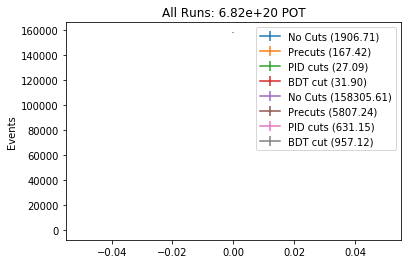

[0.03668376] [0.00026505]
[0.00398692] [7.51154735e-05]
[0.00604604] [0.00017052]


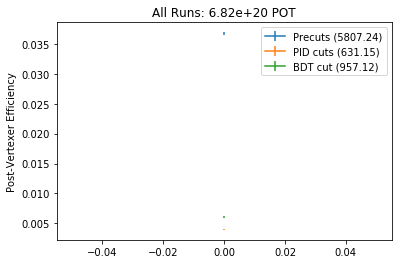

In [10]:
# newCalib_m = 0.01255796
BE = 29.5
def getTrainingDF(idf):
    rdf = pd.DataFrame()
    
    Electron_Edep = newCalib_m*np.array(idf['shower1_sumQ_Y'])
    Proton_Edep = np.array(idf['Proton_Edep'])
    Proton_ThetaReco = np.array(idf['Proton_ThetaReco'])
    Proton_PhiReco = np.array(idf['Proton_PhiReco'])
    Lepton_ThetaReco = np.array(idf['Lepton_ThetaReco'])
    Lepton_PhiReco = np.array(idf['Lepton_PhiReco'])
    
    Enu_1e1p = -9999*np.ones_like(Electron_Edep)
    PT_1e1p = -9999*np.ones_like(Electron_Edep)
    AlphaT_1e1p = -9999*np.ones_like(Electron_Edep)
    PzEnu_1e1p = -9999*np.ones_like(Electron_Edep)
    Q3_1e1p = -9999*np.ones_like(Electron_Edep)
    Q0_1e1p = -9999*np.ones_like(Electron_Edep)
    pTRat_1e1p = -9999*np.ones_like(Electron_Edep)
    SphB_1e1p = -9999*np.ones_like(Electron_Edep)
    BjXB_1e1p = -9999*np.ones_like(Electron_Edep)
    BjYB_1e1p = -9999*np.ones_like(Electron_Edep)
    
    for i in range(len(Electron_Edep)):
        Enu_1e1p[i]            = ECal(Electron_Edep[i],Proton_Edep[i],'electron',B=BE)
        PT_1e1p[i]             = pTrans(Electron_Edep[i],Proton_Edep[i],
                                     Lepton_ThetaReco[i],Proton_ThetaReco[i],
                                     Lepton_PhiReco[i],Proton_PhiReco[i],'electron')
        AlphaT_1e1p[i]         = alphaT(Electron_Edep[i],Proton_Edep[i],
                                     Lepton_ThetaReco[i],Proton_ThetaReco[i],
                                     Lepton_PhiReco[i],Proton_PhiReco[i],'electron')
        PzEnu_1e1p[i]          = Getpz(Electron_Edep[i],Proton_Edep[i],
                                    Lepton_ThetaReco[i],Proton_ThetaReco[i],'electron') - Enu_1e1p[i]
        Q3_1e1p[i],Q0_1e1p[i]     = Getq3q0(Proton_Edep[i],Electron_Edep[i],
                                      Proton_ThetaReco[i],Lepton_ThetaReco[i],
                                      Proton_PhiReco[i],Lepton_PhiReco[i],'electron',B=BE)
        pTRat_1e1p[i]          = pTransRat(Electron_Edep[i],Proton_Edep[i],
                                    Lepton_ThetaReco[i],Proton_ThetaReco[i],
                                    Lepton_PhiReco[i],Proton_PhiReco[i],'electron')
        
        try:
            (pEB_1e1p,eEB_1e1p,pThB_1e1p,
             eThB_1e1p,pPhB_1e1p,ePhB_1e1p,
             EcalB_1e1p,EpCCQEB_1e1p,
             EeCCQEB_1e1p,sphB_1e1p) = BoostTracks(Electron_Edep[i],Proton_Edep[i],
                                                   Lepton_ThetaReco[i],Proton_ThetaReco[i],
                                                   Lepton_PhiReco[i],Proton_PhiReco[i],'electron')
            Q2calB_1e1p          = Q2(EcalB_1e1p,eEB_1e1p,eThB_1e1p)
            EHadB_1e1p           = (EcalB_1e1p - eEB_1e1p - .511)
            yB_1e1p              = EHadB_1e1p/EcalB_1e1p
            xB_1e1p              = Q2calB_1e1p/(2*939.5654*EHadB_1e1p)
            dEp_1e1p            = EpCCQEB_1e1p - EcalB_1e1p
            dEe_1e1p            = EeCCQEB_1e1p - EcalB_1e1p
            dEep_1e1p           = EpCCQEB_1e1p - EeCCQEB_1e1p

            SphB_1e1p[i] = sqrt(dEp_1e1p**2+dEe_1e1p**2+dEep_1e1p**2)
            BjXB_1e1p[i],BjYB_1e1p[i]    = xB_1e1p,yB_1e1p
            
        except:
            pass
            
    
    rdf['Enu_1e1p'] = Enu_1e1p
    rdf['Electron_Edep'] = Electron_Edep
    rdf['PT_1e1p'] = PT_1e1p
    rdf['AlphaT_1e1p'] = AlphaT_1e1p
    rdf['SphB_1e1p'] = SphB_1e1p
    rdf['PzEnu_1e1p'] = PzEnu_1e1p
    rdf['ChargeNearTrunk'] = idf['ChargeNearTrunk'].values
    rdf['Q0_1e1p'] = Q0_1e1p
    rdf['Q3_1e1p'] = Q3_1e1p
    rdf['Thetas'] = idf['Thetas'].values
    rdf['Phis'] = idf['Phis'].values
    rdf['pTRat_1e1p'] = pTRat_1e1p
    rdf['Proton_TrackLength'] = idf['Proton_TrackLength'].values
    rdf['Lepton_TrackLength'] = idf['Lepton_TrackLength'].values
    rdf['Proton_ThetaReco'] = Proton_ThetaReco
    rdf['Proton_PhiReco'] = Proton_PhiReco
    rdf['Lepton_ThetaReco'] = Lepton_ThetaReco
    rdf['Lepton_PhiReco'] = Lepton_PhiReco
    rdf['MinShrFrac'] = np.maximum(idf['MinShrFrac'].values,-1*np.ones_like(idf['MinShrFrac'].values))
    rdf['MaxShrFrac'] = np.maximum(idf['MaxShrFrac'].values,-1*np.ones_like(idf['MaxShrFrac'].values))
    rdf['shower_fraction'] = idf['shower1_smallQ_Y'].values/(idf['shower1_sumQ_Y'].values+1e-6)
    rdf['BjXB_1e1p'] = BjXB_1e1p
    rdf['BjYB_1e1p'] = BjYB_1e1p
    
    return rdf
    
    
    
    

pi2 = np.pi/2
pi2m = np.pi/2 - 0.25
pi2p = np.pi/2 + 0.25
precuts = 'PassSimpleCuts==1 and PassShowerReco==1 and TotPE>20 and PorchTotPE<20 and \
           Proton_Edep>50 and Electron_Edep>35 and MaxShrFrac>0.2 and OpenAng>0.5 and \
           (not FailedBoost_1e1p) and Proton_ThetaReco<@pi2 and shcons < 2'

postcuts =  'mpidg_y/(mpide_y+0.0001)<2 and \
            (Electron_Edep < 100 or mpidm_y<0.2) and \
            _pi0mass < 50'

postcuts = 'Enu_1e1p > 200 and Enu_1e1p < 1200 and (Lepton_PhiReco < @pi2m or Lepton_PhiReco > @pi2p) and \
            Thetas > 0.75 and Thetas < 2.5 and Q0_1e1p < 350 and Q3_1e1p > 250 and Q3_1e1p < 850 and \
            mpidp_y > 0.1'

postcuts = 'BDTscore_1e1p > 0.01 and BDTscore_1e1p < 0.7 and (Lepton_PhiReco < @pi2m or Lepton_PhiReco > @pi2p)'
            
RSE = ['run','subrun','event']
goodruns = {1:'../aux/pass_r1.txt',
            2:'../aux/pass_r2.txt',
            3:'../aux/pass_r3.txt'}
b=1

n0tot = np.zeros(b)
n1tot = np.zeros(b)
n2tot = np.zeros(b)
n3tot = np.zeros(b)
e0tot = np.zeros(b)
e1tot = np.zeros(b)
e2tot = np.zeros(b)
e3tot = np.zeros(b)

for r in [1,2,3]:
    print('\n\n','#'*20,'RUN',r,'#'*20,'\n')
    dfgr = pd.read_csv(goodruns[r])
    for tag in FileDict[r].keys():
        if not lowEpatch and 'lowE' in tag: continue
        #if not 'ext' in tag: continue
        print('Sample:',FileDict[r][tag])
        df = read_root(FileDict[r][tag],key=TreeDict[r][tag])
        df['mpidg_y'] = [x[-1] for x in list(df['GammaPID_int_v'])]
        df['mpidm_y'] = [x[-1] for x in list(df['MuonPID_int_v'])]
        df['mpide_y'] = [x[-1] for x in list(df['EminusPID_int_v'])]
        df['mpidp_y'] = [x[-1] for x in list(df['ProtonPID_int_v'])]
        df['shcons'] = GetShCons(np.array(df['shower1_sumQ_U']),
                                 np.array(df['shower1_sumQ_V']),
                                 np.array(df['shower1_sumQ_Y']))
        df['MaxShrFrac'] = np.maximum(df['MaxShrFrac'].values,-1*np.ones_like(df['MaxShrFrac'].values))
        df['EnuTrue'] = df['MC_energyInit']
        if genieDict[r][tag] is not None:
            dfg = read_root(genieDict[r][tag],key='eventweight_tree')
            df_full = df.join(dfg.set_index(RSE)[['xsec_corr_weight','lee_weight']],on=RSE) 
            df_full['xsec_corr_weight'] = np.where(np.isinf(df_full['xsec_corr_weight'].values),1.0,df_full['xsec_corr_weight'].values)
            
        else:
            df['xsec_corr_weight'] = np.ones_like(df['mpidg_y'].values)
            df['lee_corr_weight'] = np.ones_like(df['mpidg_y'].values)
            df_full = df
        
            
        #dfpi0 = pd.read_csv(pi0Dict[r][tag],names=['run','subrun','event','MC_EnergyInit','pi0weight'])
        
        
        if tag=='overlay':
            dfsig = df_full.query('MC_parentPDG!=12 and MC_parentPDG!=-12')
        else:
            dfsig = df_full
        dfsig = pd.merge(dfsig,dfgr,how='inner',left_on=['run'],right_on=['run'])
        df0 = dfsig.copy().drop_duplicates(RSE)
        DATPOT = DATPOTDICT[r]
        if r==3 and tag=='ext': DATPOT += DATPOTDICT[2]
        w = DATPOT/POTDICT[r][tag]*df0['xsec_corr_weight']
        n0,_,_ = plt.hist(df0['MC_energyInit'],weights=w,range=(0,2000),bins=b,histtype='step')
        e0,_,_ = plt.hist(df0['MC_energyInit'],weights=w**2,range=(0,2000),bins=b)
        plt.clf()
        dfsigpre = dfsig.query(precuts)
        df1 = dfsigpre.copy().drop_duplicates(RSE)
        w = DATPOT/POTDICT[r][tag]*df1['xsec_corr_weight']
        n1,_,_ = plt.hist(df1['MC_energyInit'],weights=w,range=(0,2000),bins=b,histtype='step')
        e1,_,_ = plt.hist(df1['MC_energyInit'],weights=w**2,range=(0,2000),bins=b)
        plt.clf()
        dfsigpost = dfsigpre.query(postcuts)
        df2 = dfsigpost.copy().drop_duplicates(RSE)
        w = DATPOT/POTDICT[r][tag]*df2['xsec_corr_weight']
        n2,_,_ = plt.hist(df2['MC_energyInit'],weights=w,range=(0,2000),bins=b,histtype='step')
        e2,_,_ = plt.hist(df2['MC_energyInit'],weights=w**2,range=(0,2000),bins=b)
        plt.clf()
        
        dfsigtrain = getTrainingDF(dfsigpost)
        ensemble.inference(dfsigtrain,dfsigpost,r,tag)
        ensemble.MakeBDTcut(dfsigpost,0.0,'avgscore',r==2 and tag=='overlay')
        
        df3 = dfsigpost.copy().drop_duplicates(RSE)
        w = DATPOT/POTDICT[r][tag]*df3['xsec_corr_weight']#*df3['bdtweight']
        n3,_,_ = plt.hist(df3['Enu_1e1p'],weights=w,range=(0,2000),bins=b,histtype='step')
        e3,_,_ = plt.hist(df3['Enu_1e1p'],weights=w**2,range=(0,2000),bins=b)
        plt.clf()
        
        
        plt.errorbar(np.linspace(0,2000,b),n0,yerr=np.sqrt(e0),label='No Cuts (%2.2f)'%sum(n0))
        plt.errorbar(np.linspace(0,2000,b),n1,yerr=np.sqrt(e1),label='Precuts (%2.2f)'%sum(n1))
        plt.errorbar(np.linspace(0,2000,b),n2,yerr=np.sqrt(e2),label='PID cuts (%2.2f)'%sum(n2))
        plt.errorbar(np.linspace(0,2000,b),n3,yerr=np.sqrt(e3),label='BDT cut (%2.2f)'%sum(n3))
        plt.legend()
        plt.title('Run %i: %2.2e POT'%(r,DATPOTDICT[r]))
        #plt.show()
        
        
        n0tot += n0
        n1tot += n1
        n2tot += n2
        n3tot += n3
        
        e0tot += e0
        e1tot += e1
        e2tot += e2
        e3tot += e3
        
        print(r,tag,'%2.2f (%2.2f) (%i)'%(n3,sqrt(e3),sum(w>0)),POTDICT[r][tag]/DATPOTDICT[r])
        
print(n0tot,e0tot)
print(n1tot,e1tot)
print(n2tot,e2tot)
print(n3tot,e3tot)
        

plt.errorbar(np.linspace(0,2000,b),n0tot,yerr=np.sqrt(e0tot),label='No Cuts (%2.2f)'%sum(n0tot))
plt.errorbar(np.linspace(0,2000,b),n1tot,yerr=np.sqrt(e1tot),label='Precuts (%2.2f)'%sum(n1tot))
plt.errorbar(np.linspace(0,2000,b),n2tot,yerr=np.sqrt(e2tot),label='PID cuts (%2.2f)'%sum(n2tot))
plt.errorbar(np.linspace(0,2000,b),n3tot,yerr=np.sqrt(e3tot),label='BDT cut (%2.2f)'%sum(n3tot))
plt.legend()
plt.title('All Runs: %2.2e POT'%(DAT_POT1+DAT_POT2+DAT_POT3))
plt.ylabel('Events')
plt.show()

n1rat = n1tot/n0tot
n1err = n1rat * np.sqrt(e1tot/n1tot**2 + e0tot/n0tot**2)
n2rat = n2tot/n0tot
n2err = n2rat * np.sqrt(e2tot/n2tot**2 + e0tot/n0tot**2)
n3rat = n3tot/n0tot
n3err = n3rat * np.sqrt(e3tot/n3tot**2 + e0tot/n0tot**2)

print(n1rat,n1err)
print(n2rat,n2err)
print(n3rat,n3err)

plt.errorbar(np.linspace(0,2000,b),n1rat,yerr=n1err,label='Precuts (%2.2f)'%sum(n1tot))
plt.errorbar(np.linspace(0,2000,b),n2rat,yerr=n2err,label='PID cuts (%2.2f)'%sum(n2tot))
plt.errorbar(np.linspace(0,2000,b),n3rat,yerr=n3err,label='BDT cut (%2.2f)'%sum(n3tot))
plt.legend()
plt.title('All Runs: %2.2e POT'%(DAT_POT1+DAT_POT2+DAT_POT3))
plt.ylabel('Post-Vertexer Efficiency')
plt.show()
        


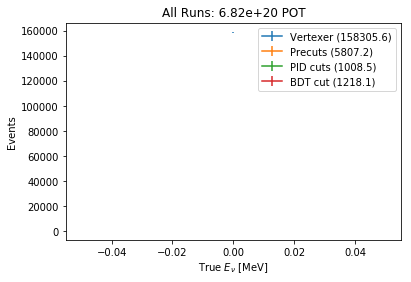

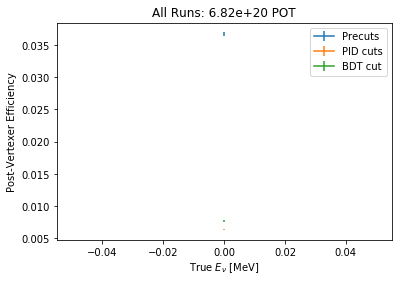

In [7]:
plt.errorbar(np.linspace(0,2000,b),n0tot,yerr=np.sqrt(e0tot),label='Vertexer (%2.1f)'%sum(n0tot))
plt.errorbar(np.linspace(0,2000,b),n1tot,yerr=np.sqrt(e1tot),label='Precuts (%2.1f)'%sum(n1tot))
plt.errorbar(np.linspace(0,2000,b),n2tot,yerr=np.sqrt(e2tot),label='PID cuts (%2.1f)'%sum(n2tot))
plt.errorbar(np.linspace(0,2000,b),n3tot,yerr=np.sqrt(e3tot),label='BDT cut (%2.1f)'%sum(n3tot))
plt.legend()
plt.title('All Runs: %2.2e POT'%(DAT_POT1+DAT_POT2+DAT_POT3))
plt.ylabel('Events')
plt.xlabel(r'True $E_\nu$ [MeV]')
plt.show()

plt.errorbar(np.linspace(0,2000,b),n1rat,yerr=n1err,label='Precuts')
plt.errorbar(np.linspace(0,2000,b),n2rat,yerr=n2err,label='PID cuts')
plt.errorbar(np.linspace(0,2000,b),n3rat,yerr=n3err,label='BDT cut')
plt.legend()
plt.title('All Runs: %2.2e POT'%(DAT_POT1+DAT_POT2+DAT_POT3))
plt.ylabel('Post-Vertexer Efficiency')
plt.xlabel(r'True $E_\nu$ [MeV]')
plt.show()

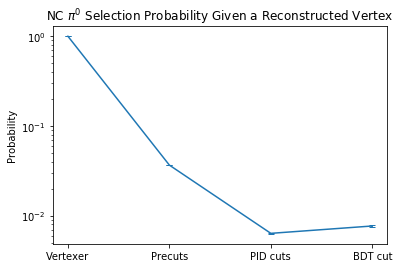

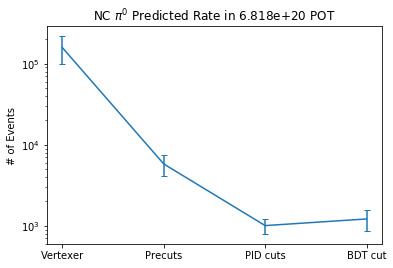

In [8]:
plt.errorbar([0,1,2,3],[1.0,n1rat.item(),n2rat.item(),n3rat.item()],yerr=[0.0,n1err.item(),n2err.item(),n3err.item()],capsize=3)
plt.semilogy()
plt.title(r'NC $\pi^0$ Selection Probability Given a Reconstructed Vertex')
plt.ylabel('Probability')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(('Vertexer','Precuts','PID cuts','BDT cut'))
plt.show()

plt.errorbar([0,1,2,3],[n0tot.item(),n1tot.item(),n2tot.item(),n3tot.item()],yerr=[e0tot.item(),e1tot.item(),e2tot.item(),e3tot.item()],capsize=3)
plt.semilogy()
plt.title(r'NC $\pi^0$ Predicted Rate in %3.3e POT'%(DAT_POT1+DAT_POT2+DAT_POT3))
plt.ylabel('# of Events')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(('Vertexer','Precuts','PID cuts','BDT cut'))
plt.show()